The KNN algorithm is very simple to implement, as it does not need to be trained. The training phase merely stores the training data. For each test point, we calculate the distance of that data point to every existing data point and find the $K$ closest ones. What we return is the the most common amongst the top k classification nearest to the test point. Here's the pseudocode for _K_ Nearest Neighbors:

```
kNN:

    Learn:
        Store training set T to X_train: X_train <-- T


    Predict:
        for every point xp in X_predict:
            for every point x in X_train:
                calculate the distance d in D between x and xp
            sort D in increasing order
            take the "k" items in X_train with the smallest distances to x
            return the majority class among these k items
```

Note that for large data sets, the algorithm can take very long to classify because it has to calculate the distance between the test point and evey other point in the data!


# Distance Metrics - Note

As explained above, KNN assigns a class to the test point based on the majority class of  KK  nearest neighbours. In general, euclidean distance is used to find nearest neighbours, but other distance metrics can also be used.

As the dimensionality of the feature space increases, the euclidean distance often becomes problematic due to the curse of dimensionality (discussed later).

In such cases, alternative vector-based similarity measures (dot product, cosine similarity, etc) are used to find the nearest neighbours. This transforms the original metric space into one more amicable to point-to-point measurements.

Another distance measure that you might consider is Mahalanobis distance. Here's the wikipedia page on Mahalanobis distance. https://en.wikipedia.org/wiki/Mahalanobis_distance Mahalanobis distance attempts to weight features according to their probabilities. On some data sets that may be important.

In general, it's probably a good idea to normalize the data at a minimum. Here's a link to the scikit learn scaling package. http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html . You have to be a little circumspect about employing any technique where the answers change with scaling.

In [33]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean
import seaborn as sns

In [ ]:
def distance(t1, t2, c=2, verbose=True):
    dist = []
    for i in range(len(t1)):
            dist.append(np.power(abs(t2[i] - t1[i]), c))
    return np.power(sum(dist), 1/c)

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/onelharrison/443fe58ec1e15b18b19f305441cf7173/raw/a97be8160b63c6607b4f4498508a3851dcd110c2/movies_recommendation_data.csv')

In [183]:
dist_arr = np.zeros((m,m))
df_arr = df.iloc[:, 2:]
df_arr = df_arr.to_numpy()
k = 2

for row in range(df_arr.shape[0]-1):
    for col in range(df_arr.shape[0]):
        dist = euclidean(df_arr[row, :], df_arr[col,:])
        dist_arr[row,col] = dist

ind_arr = dist_arr.argsort(axis=0)

for i in range(df_arr.shape[0]):
    print('The Nearest Neighbor/s of %s is/are:' % df['Movie Name'][i])
    print('####################################')
    for j in range(1,k+1): # start at 1 since closes distance is always to it self
        index = np.sort(ind_arr[i,:])[j]
        
        print(df['Movie Name'][index])

The Nearest Neighbor/s of The Imitation Game is/are:
####################################
Black Panther
Queen of Katwe
The Nearest Neighbor/s of Ex Machina is/are:
####################################
A Beautiful Mind
Good Will Hunting
The Nearest Neighbor/s of A Beautiful Mind is/are:
####################################
A Beautiful Mind
A Beautiful Mind
The Nearest Neighbor/s of Good Will Hunting is/are:
####################################
A Beautiful Mind
Good Will Hunting
The Nearest Neighbor/s of Forrest Gump is/are:
####################################
A Beautiful Mind
Gifted
The Nearest Neighbor/s of 21 is/are:
####################################
Good Will Hunting
Good Will Hunting
The Nearest Neighbor/s of Gifted is/are:
####################################
The Imitation Game
Ex Machina
The Nearest Neighbor/s of Travelling Salesman is/are:
####################################
Ex Machina
A Beautiful Mind
The Nearest Neighbor/s of Avatar is/are:
################################

In [184]:
ind_arr

array([[ 0, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 14, 29,
        29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29],
       [29,  1,  2,  3,  4,  5,  6,  7,  8, 10, 10, 11, 12, 13, 29, 15,
        16, 17, 21, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 16],
       [ 2,  6, 16, 12, 12,  9, 21, 20, 22,  9,  9, 21,  4, 23, 19, 17,
         2, 15, 18, 14, 26, 18, 24, 25, 22,  8, 19, 28, 27,  2],
       [16, 21, 27,  4,  3, 10, 18,  9, 24, 21, 21, 18,  3, 25, 26, 24,
         6, 24, 10, 26,  7, 10,  8, 13,  8, 22, 14,  2,  2, 21],
       [28, 18, 28,  6, 15, 21, 10, 10, 14, 18, 18, 10,  6,  2,  8, 22,
         0, 22,  9,  8, 19,  9, 17, 26, 17, 24,  8, 16, 16, 18],
       [27,  9,  3, 18, 17, 18,  9, 21, 19,  6,  6,  9, 17, 24, 22,  8,
        28,  8,  6, 22, 14,  6, 14, 19, 14, 14, 22,  3,  0,  6],
       [ 3, 10,  0, 21,  2, 11,  3, 18, 17, 19, 19,  6, 15, 22, 24,  4,
        27, 12, 19, 24,  1, 19, 19, 14, 15, 19, 24,  0,  3, 10],
       [ 6,  3, 12,  2,  6,  6, 12,  1, 2

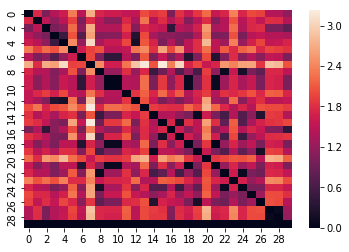

In [143]:
sns.heatmap(dist_arr)